# EDA

**In This Part We Will try to get insightful key findings that would enable better understanding of the data and will help solving the tasks**

**We will find the following in this section:**

**1- Have a quick look on the continous features of the data**

**2- View class balance**

**3- Check the transaction type for fraud vs valid transaction**

**4- Check the distribution of transactions among time steps**

**Step1: Have a quick look on the data**


In [1]:
#importing important liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
data = pd.read_csv("./Data/transactions_train.csv")
data["isFradulentNamed"] = data.isFraud.map(lambda x: "fraud" if x==1 else "not fraud")
Fraud_data = data[data.isFraud==1]
Not_Fraud_data = data[data.isFraud==0]

In [3]:
#check for nans
data.isnull().sum()

step                0
type                0
amount              0
nameOrig            0
oldbalanceOrig      0
newbalanceOrig      0
nameDest            0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFradulentNamed    0
dtype: int64

**Display the data for quick look**

In [4]:
#display all data
display(data)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFradulentNamed
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,not fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,not fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,not fraud
...,...,...,...,...,...,...,...,...,...,...,...
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.00,C404511346,0.00,0.00,1,fraud
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.00,C446134087,0.00,162326.52,1,fraud
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.00,C619602282,0.00,0.00,1,fraud
6351191,699,CASH_OUT,2763398.31,C1491503658,2763398.31,0.00,C454424230,339515.35,3102913.66,1,fraud


In [5]:
#display fraud data
display(Fraud_data)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFradulentNamed
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,fraud
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,fraud
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,fraud
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,fraud
...,...,...,...,...,...,...,...,...,...,...,...
6351186,699,CASH_OUT,62372.43,C1915659563,62372.43,0.0,C421781202,1195387.47,1257759.90,1,fraud
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.0,C404511346,0.00,0.00,1,fraud
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.0,C446134087,0.00,162326.52,1,fraud
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.0,C619602282,0.00,0.00,1,fraud


In [6]:
#display non fraud data
display(Not_Fraud_data)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFradulentNamed
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,not fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,not fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,not fraud
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,not fraud
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,not fraud
...,...,...,...,...,...,...,...,...,...,...,...
6351180,699,TRANSFER,549094.49,C519897821,0.0,0.00,C1595954485,628327.62,1177422.11,0,not fraud
6351181,699,TRANSFER,125500.53,C1180820392,0.0,0.00,C733485865,174727.81,300228.35,0,not fraud
6351184,699,PAYMENT,302.09,C1506297825,3691.0,3388.91,M276665299,0.00,0.00,0,not fraud
6351187,699,PAYMENT,573.88,C1774322624,561.0,0.00,M358479392,0.00,0.00,0,not fraud


**Display the stats of the data**

In [7]:
#Quick stats for the fraud samples
Fraud_data.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,7717.000000,7.717000e+03,7.717000e+03,7.717000e+03,7.717000e+03,7.717000e+03,7717.0
mean,345.670986,1.449185e+06,1.599242e+06,1.580467e+05,5.497466e+05,1.277603e+06,1.0
std,203.120548,2.364817e+06,3.310424e+06,1.703123e+06,3.421790e+06,3.973945e+06,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,170.000000,1.271565e+05,1.261926e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,346.000000,4.438937e+05,4.424603e+05,0.000000e+00,0.000000e+00,5.566140e+03,1.0
75%,521.000000,1.506795e+06,1.506795e+06,0.000000e+00,1.479548e+05,1.057953e+06,1.0
max,699.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0


In [8]:
#Quick stats for the no fraud samples
Not_Fraud_data.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.343476e+06,6.343476e+06,6.343476e+06,6.343476e+06,6.343476e+06,6.343476e+06,6343476.0
mean,2.424299e+02,1.782713e+05,8.338657e+05,8.570189e+05,1.101713e+06,1.225308e+06,0.0
std,1.409296e+02,5.966982e+05,2.889287e+06,2.927148e+06,3.398841e+06,3.673913e+06,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.550000e+02,1.336803e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.380000e+02,7.468898e+04,1.402100e+04,0.000000e+00,1.336600e+05,2.151117e+05,0.0
75%,3.340000e+02,2.083801e+05,1.070190e+05,1.448102e+05,9.449661e+05,1.112848e+06,0.0
max,6.990000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0


**From the first look on the data it seems that there is no reasonable correlation between old and new balance
for both sender and reciever. It would be reasonable if the absolute difference between the balance before and after the transaction is the amount of transaction but this seems to be not applied in the dataset.**

**This might be normal due to some banking policiy or might be a sign of fraud operations. Let's validate this witth numbers.**

**View the difference between old and new balance for origin account**

In [9]:
#Difference between Old and new origin balance for no fraud data 
difference_pct = np.mean((Not_Fraud_data.oldbalanceOrig.round() - Not_Fraud_data.newbalanceOrig.round())\
                         ==Not_Fraud_data.amount.round())

print("Old vs new origin balance equals the transaction amount for almost {:.2f}% of the not fraud data".format(difference_pct*100))

Old vs new origin balance equals the transaction amount for almost 19.26% of the not fraud data


In [10]:
#Difference between Old and new destination balance for no fraud data 
difference_pct = np.mean((Not_Fraud_data.newbalanceDest.round() - Not_Fraud_data.oldbalanceDest.round())\
                         ==Not_Fraud_data.amount.round())
print("Old vs new destination balance equals the transaction amount for almost {:.2f}% of the not fraud data".format(difference_pct*100))

Old vs new destination balance equals the transaction amount for almost 31.36% of the not fraud data


**View the difference between old and new balance for destination account**

In [11]:
#Difference between Old and new destination balance for no fraud data 
difference_pct = np.mean((Fraud_data.newbalanceDest.round() - Fraud_data.oldbalanceDest.round())\
                         ==Fraud_data.amount.round())
print("Old vs new destination balance equals the transaction amount for almost {:.2f}% of the fraud data".format(difference_pct*100))

Old vs new destination balance equals the transaction amount for almost 40.59% of the fraud data


In [12]:
#Difference between Old and new origin balance for no fraud data 
difference_pct = np.mean((Fraud_data.oldbalanceOrig.round() - Fraud_data.newbalanceOrig.round())\
                         ==Fraud_data.amount.round())

print("Old vs new origin balance equals the transaction amount for almost {:.2f}% of the fraud data".format(difference_pct*100))

Old vs new origin balance equals the transaction amount for almost 99.46% of the fraud data


**Also, it is noticeable that for fraud data, the amount of transaction is exactly the same amount of original balance. This also needs verification as it might correlate to fraud operations.**

In [13]:
#amount equals original balance for not fraud data
amount_orig_balance_diff = np.mean(Not_Fraud_data.oldbalanceOrig.round() == Not_Fraud_data.amount.round())
print("The amount of transaction is exactly the same amount of original balance for almost {:.2f}% of the not fraud data".format(amount_orig_balance_diff*100))

The amount of transaction is exactly the same amount of original balance for almost 0.00% of the not fraud data


In [14]:
#amount equals original balance for fraud data
amount_orig_balance_diff = np.mean(Fraud_data.oldbalanceOrig.round() == Fraud_data.amount.round())
print("The amount of transaction is exactly the same amount of original balance for almost {:.2f}% of the fraud data".format(amount_orig_balance_diff*100))

The amount of transaction is exactly the same amount of original balance for almost 97.94% of the fraud data


**Step2: View class imbalance**


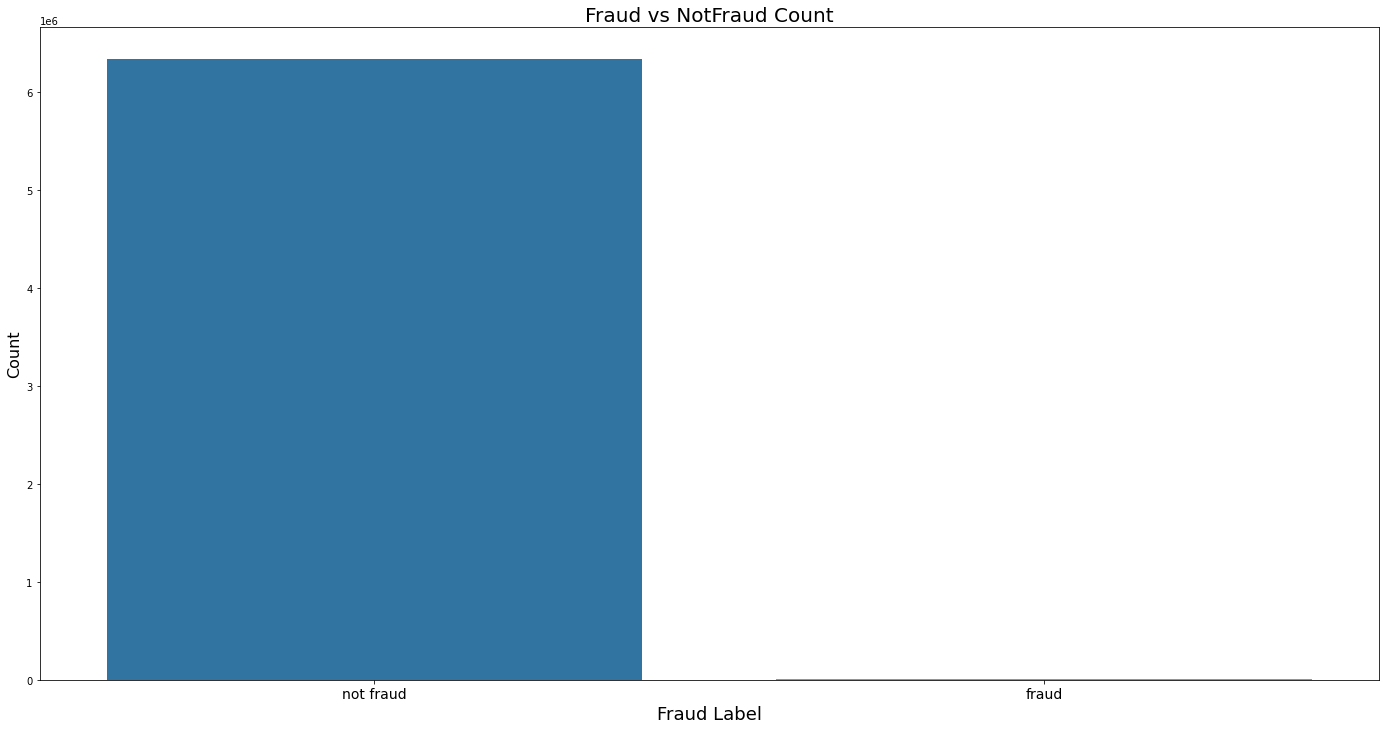

In [15]:
#view class imbalance
def display_class_balance():
    plt.figure(figsize = (24, 12))
    chart=sns.countplot(data = data,
                         x="isFradulentNamed")
    plt.xlabel('Fraud Label', fontsize=18)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(fontsize=14)
    plt.title('Fraud vs NotFraud Count', fontsize=20);

display_class_balance()

**Numerical data might be more visual for this class imbalance**

In [16]:
def get_fraud_counts(data):
    counts = data.isFradulentNamed.value_counts().to_dict()
    print(f"Fraud samples: {counts['fraud']}, Not Fraud samples: {counts['not fraud']}, Fraud PCT: {counts['fraud']*100/counts['not fraud']}%")
    return counts["fraud"], counts["not fraud"]

fraud_cnt, not_fraud_cnt = get_fraud_counts(data)

Fraud samples: 7717, Not Fraud samples: 6343476, Fraud PCT: 0.12165254507150339%


**step3: Check the transaction type for fraud vs valid transaction**

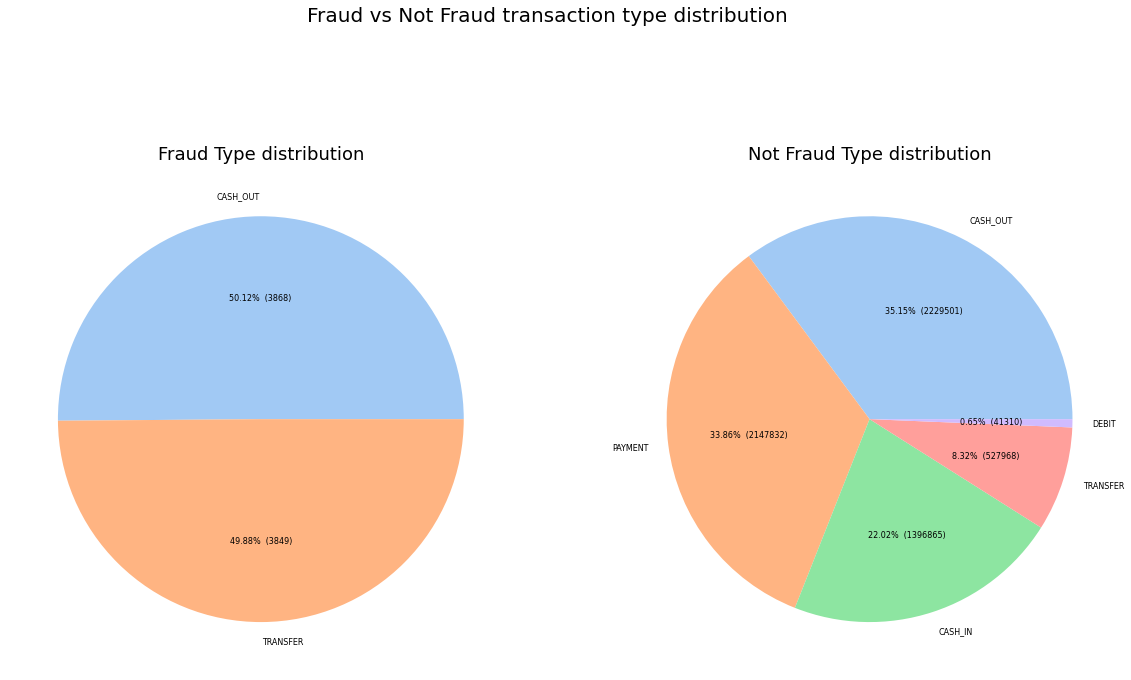

In [17]:
##HELPER FUNCTIONS TO VISUALIZE pie distributions with percent
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def display_pie_segments(analogy = "type"):
    fraud_Info = Fraud_data["type"].value_counts().to_dict()
    not_fraud_Info = Not_Fraud_data["type"].value_counts().to_dict()
    
    colors = sns.color_palette('pastel')[:10]

    fig, axes = plt.subplots(1, 2, figsize = (20,12))

    axes[0].pie(fraud_Info.values(), labels = fraud_Info.keys(), colors = colors[:len(fraud_Info)], 
                autopct=make_autopct(fraud_Info.values()), textprops={'fontsize': 8})
    axes[0].set_title('Fraud Type distribution', fontsize = 18)

    axes[1].pie(not_fraud_Info.values(), labels = not_fraud_Info.keys(), colors = colors[:len(not_fraud_Info)], 
                autopct=make_autopct(not_fraud_Info.values()), textprops={'fontsize': 8})
    axes[1].set_title('Not Fraud Type distribution', fontsize = 18)

    fig.suptitle(f"Fraud vs Not Fraud transaction type distribution", fontsize=20)
    plt.show()

display_pie_segments()

**step4: Check the distribution of transactions among time steps**

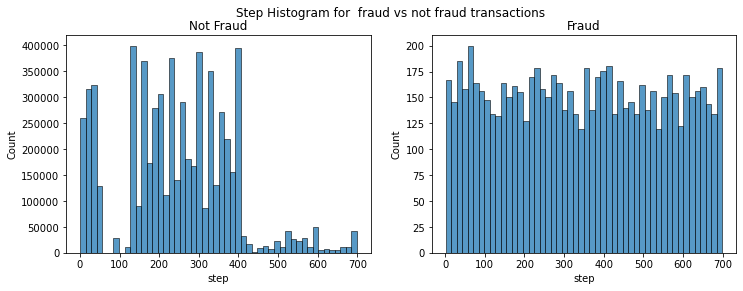

In [18]:
def display_step_transaction_histogram():
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
    for i in range(len(axes)):
        if i==0:
            sns.histplot(data = Not_Fraud_data, x="step",bins=50, ax=axes[i])
            axes[i].set_title('Not Fraud', fontsize = 12)
        else:
            sns.histplot(data = Fraud_data, x="step", bins=50, ax=axes[i])
            axes[i].set_title('Fraud', fontsize = 12)

    plt.suptitle("Step Histogram for  fraud vs not fraud transactions")
    plt.show()

display_step_transaction_histogram()

 **EDA RESULTS SUMMARY**

**From the above we can conclude the following:**

**1- Data has no nan values.**

**2- The difference between Old vs new balance which is not the expected action, this is significant specially in the destination balance in fraud examples. It is recommended to add this as a feature in the training data.**

**3- It is noticeable that the amount of transaction is exactly the same amount of original balance. This also significant in fraud examples and should also be added as a feature.**

**4- Data is greatly imbalanced with only 0.121% of data samples labeled as fraud, this is natural for this type of problems.**

**5- Cash out and transfer transactions are the only transaction types involved in fraud. This is very significant however, we should not exclude other types as transaction type is not the only significant feature for fraud.**

**6- When analysing the not fraud data, we find that transactions at timesteps>400 are less likely to take place, but they still happen frequently when compared to the fraud transaction frequency at these time steps.**